In [1]:
import pandas as pd
import json
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
# sns.set(style='ticks', context='paper', font='CMU Sans Serif')
sns.set(style='ticks', context='paper')
from collections import defaultdict
import numpy as np

In [2]:
from textwrap import wrap
color_list = [
    "cornflowerblue",
    "gold",
    "deeppink",
    "orange",
    "blueviolet",
    "seagreen",
    "black",
]
hatch_list = ["o", "x", "/", ".", "*", "-", "\\"]

linestyle_list = ["solid", "dashed", "dashdot", "dotted"]
markertype_list = ["o", "^", "x", "x", "|"]
def plot_cdf(
    raw_data,
    file_name,
    linelabels,
    x_label,
    y_label="CDF",
    log_switch=False,
    rotate_xaxis=False,
    ylim_low=0,
    xlim=None,
    xlim_bottom=None,
    fontsize=15,
    legend_font=15,
    loc=2,
    title=None,
    enable_abs=False,
    group_size=1,
):
    _fontsize = fontsize
    fig = plt.figure(figsize=(6, 4))  # 2.5 inch for 1/3 double column width
    ax = fig.add_subplot(111)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax.tick_params(axis="y", direction="in")
    ax.tick_params(axis="x", direction="in")
    if log_switch:
        ax.set_xscale("log")

    plt.ylabel(y_label, fontsize=_fontsize)
    plt.xlabel(x_label, fontsize=_fontsize)
    linelabels = ["\n".join(wrap(l, 30)) for l in linelabels]
    for i in range(len(raw_data)):
        data = raw_data[i]
        data = data[~np.isnan(data)]
        if len(data) == 0:
            continue
        if enable_abs:
            data = abs(data)
        # data=random.sample(data,min(1e6,len(data)))
        data_size = len(data)
        # data=list(filter(lambda score: 0<=score < std_val, data))
        # Set bins edges
        data_set = sorted(set(data))
        bins = np.append(data_set, data_set[-1] + 1)

        # Use the histogram function to bin the data
        counts, bin_edges = np.histogram(data, bins=bins, density=False)

        counts = counts.astype(float) / data_size

        # Find the cdf
        cdf = np.cumsum(counts)

        # Plot the cdf
        if i < len(linelabels):
            plt.plot(
                bin_edges[0:-1],
                cdf,
                linestyle=linestyle_list[(i // group_size) % len(linestyle_list)],
                color=color_list[(i % group_size) % len(color_list)],
                label=linelabels[i],
                linewidth=3,
            )
        else:
            plt.plot(
                bin_edges[0:-1],
                cdf,
                linestyle=linestyle_list[(i // group_size) % len(linestyle_list)],
                color=color_list[(i % group_size) % len(color_list)],
                linewidth=3,
            )

    legend_properties = {"size": legend_font}
    plt.legend(
        prop=legend_properties,
        frameon=False,
        loc=loc,
    )

    plt.ylim((ylim_low, 1))
    if xlim_bottom:
        plt.xlim(left=xlim_bottom)
    if xlim:
        plt.xlim(right=xlim)
    # plt.tight_layout()
    # plt.tight_layout(pad=0.5, w_pad=0.04, h_pad=0.01)
    plt.yticks(fontsize=_fontsize)
    plt.xticks(fontsize=_fontsize)
    # plt.grid(True)
    if rotate_xaxis:
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment="right")
    if title:
        plt.title(title, fontsize=_fontsize - 5)
    # plt.savefig(file_name, bbox_inches="tight", pad_inches=0)

['ns3: 16448,116134.5,204264', 'pmn-m: 36,167.5,378', 'mlsys: 63,92.0,184']
mlsys: 192,192


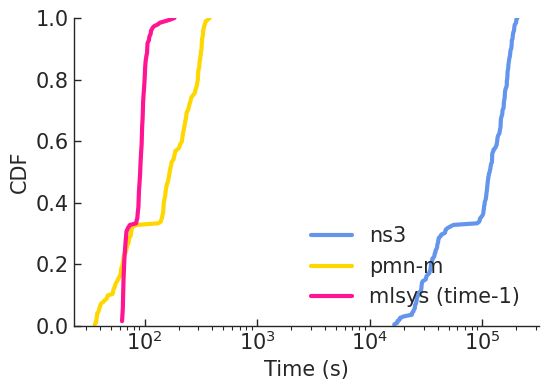

In [15]:
time_elapsed=defaultdict(lambda:[])
time_elapsed_2=[]
method_list=['ns3','pmn-m','mlsys']
for mix_id in range(192):
    for method in method_list:
        if os.path.exists(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/mlsys/elapsed.txt'):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/elapsed.txt') as file:
                for line in file:
                    if method!='mlsys':
                        tmp=line.rstrip()
                        time_elapsed[method].append(int(tmp))
                    else:
                        tmp=line.rstrip().split(',')
                        time_elapsed[method].append(int(tmp[0]))
                        time_elapsed_2.append(int(tmp[1]))
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
# legend_list=["{}:{:.0f}s, {:.0f}s, {:.0f}s".format(key,np.min(time_elapsed[key]),np.median(time_elapsed[key]),np.max(time_elapsed[key])) for key in time_elapsed]
legend_list=['ns3','pmn-m','mlsys (time-1)']
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'test.pdf',legend_list,'Time (s)',legend_font=15,group_size=len(method_list),log_switch=True,loc=4)

print(f"mlsys: {len(time_elapsed['mlsys'])},{len(time_elapsed_2)}")

[33, 35, 39, 34, 33, 1598, 37, 39, 31, 47, 53, 34, 57, 48, 34, 38, 35, 40, 26, 32, 21, 46, 52, 61, 54, 23, 26, 49, 60, 42, 42, 42, 50, 29, 22, 48, 39, 36, 51, 36, 32, 41, 49, 57, 31, 35, 41, 44, 31, 34, 31, 58, 24, 51, 49, 42, 25, 46, 29, 43, 37, 1951, 33, 57, 32, 38, 36, 38, 37, 34, 45, 31, 33, 56, 27, 40, 32, 47, 31, 55, 48, 44, 30, 50, 31, 40, 38, 25, 43, 47, 43, 47, 41, 24, 20, 37, 55, 37, 38, 34, 36, 46, 38, 29, 65, 29, 56, 1926, 49, 37, 35, 39, 58, 50, 31, 49, 35, 45, 46, 44, 38, 39, 49, 38, 42, 1845, 39, 50, 45, 35, 47, 61, 63, 38, 29, 47, 42, 51, 42, 24028, 49, 33, 40, 33, 44, 32, 33, 29, 34, 58, 31, 1607, 44, 27, 30, 51, 40, 28, 54, 39, 46, 32, 44, 34, 32, 41, 50, 45, 40, 37, 49, 43, 54, 41, 46, 45, 24, 46, 34, 45, 29, 32, 46, 31, 57, 41, 36, 39, 50, 34, 48, 40, 53, 56, 43, 40, 35, 49, 51, 35, 46, 24, 45, 50, 39, 47, 39, 44, 46, 46, 37, 31, 41, 38, 50, 49, 41, 40, 47, 34, 52, 43, 33, 37, 45, 1503, 34, 34, 37, 1962, 31, 43, 39, 38, 42, 29, 49, 47, 43, 41, 33, 38, 42, 47, 44, 44

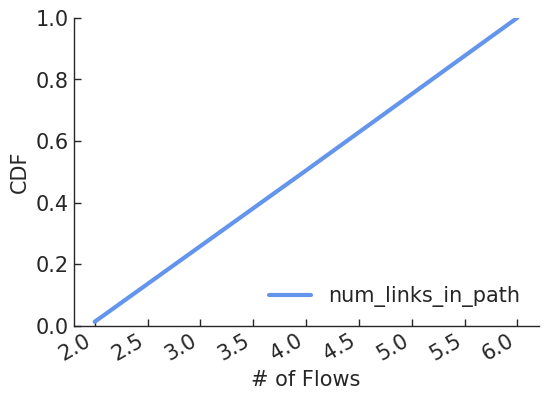

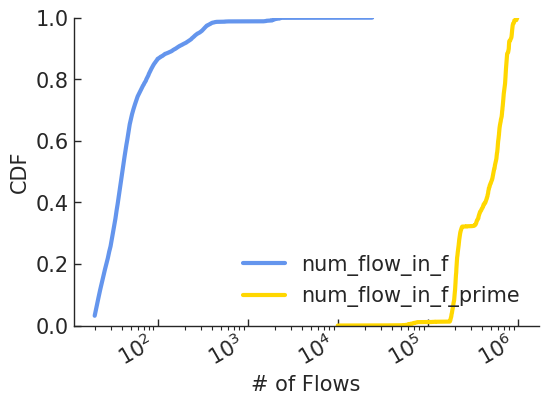

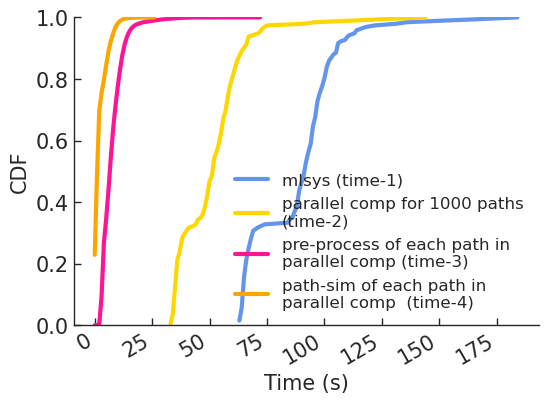

In [20]:
num_flow_in_f=[]
num_flow_in_f_prime=[]
num_link_in_path=[]
time_preprop=[]
time_path_sim=[]
method_list=['mlsys']
for mix_id in range(192):
    for method in method_list:
        for path_id in range(1000):
            if os.path.exists(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/mlsys/elapsed.txt'):
                with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path_{path_id}.txt') as file:
                    for line_id,line in enumerate(file):
                        if line_id==0:
                            tmp=line.rstrip().split(',')
                            num_flow_in_f.append(int(tmp[-2]))
                            num_flow_in_f_prime.append(int(tmp[-1]))
                            num_link_in_path.append(len(tmp)-3)
                        elif line_id==1:
                            tmp=line.rstrip()
                            time_preprop.append(int(tmp))
                        elif line_id==2:
                            tmp=line.rstrip()
                            time_path_sim.append(int(tmp))

res=np.array([num_link_in_path])
plot_cdf(res,'num_link.pdf',['num_links_in_path'],'# of Flows',legend_font=15,group_size=1,loc=4,rotate_xaxis=True)
print(num_flow_in_f)
res=np.array([num_flow_in_f,num_flow_in_f_prime])
plot_cdf(res,'num_flow.pdf',['num_flow_in_f','num_flow_in_f_prime'],'# of Flows',legend_font=15,group_size=2,loc=4,rotate_xaxis=True,log_switch=True)

res=[np.array(x) for x in [time_elapsed['mlsys'],time_elapsed_2, time_preprop,time_path_sim]]
plot_cdf(res,'time_internal.pdf',['mlsys (time-1)','parallel comp for 1000 paths (time-2)','pre-process of each path in parallel comp (time-3)','path-sim of each path in parallel comp  (time-4)'],'Time (s)',legend_font=12,group_size=4,loc=4,rotate_xaxis=True)

['mlsys: 59297.0,81308.0,144844.0']


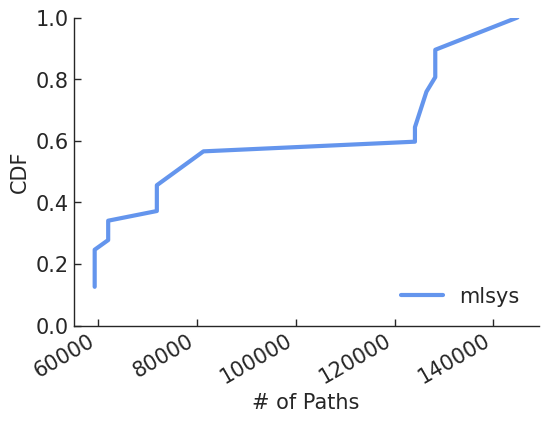

In [26]:
time_elapsed=defaultdict(lambda:[])
method_list=['mlsys']
for mix_id in range(191):
    for method in method_list:
        with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path.txt') as file:
            for line in file:
                tmp=line.rstrip()
                time_elapsed[method].append(float(tmp))
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'num_path.pdf',method_list,'# of Paths',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

In [27]:
time_elapsed=defaultdict(lambda:[])
num_flows=defaultdict(lambda:[])
method_list=['flowsim-all']
for mix_id in range(191):
    for method in method_list:
        for path_idx in range(20):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/{path_idx}/output.txt') as file:
                line_idx=0
                for line in file:
                    if line_idx==0:
                        tmp=line.rstrip().split(':')[-1]
                        num_flows[method].append(int(tmp))
                    elif line_idx==1:
                        tmp=line.rstrip().split(':')[-1]
                        time_elapsed[method].append(float(tmp))
                    line_idx+=1
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res_time=np.array(list(time_elapsed.values()))
res_flow=np.array(list(num_flows.values()))
plot_cdf(res_flow,'num_flows.pdf',method_list,'# of flows in each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)
plot_cdf(res_time,'time_elapsed.pdf',method_list,'Time (s) for each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

FileNotFoundError: [Errno 2] No such file or directory: '/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/0/flowsim-all/0/output.txt'